In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

In [3]:
df = pd.read_csv("./fetal_health.csv")

In [4]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df.shape

(2126, 22)

In [6]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [7]:
print(df.describe())


       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

C:\Users\acer\AppData\Local\Temp\ipykernel_66276\1016578441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x="fetal_health",palette=colours)


<Axes: xlabel='fetal_health', ylabel='count'>

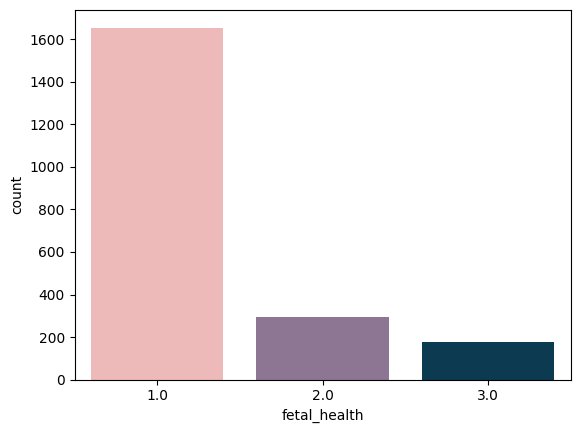

In [8]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= df, x="fetal_health",palette=colours)

<Axes: >

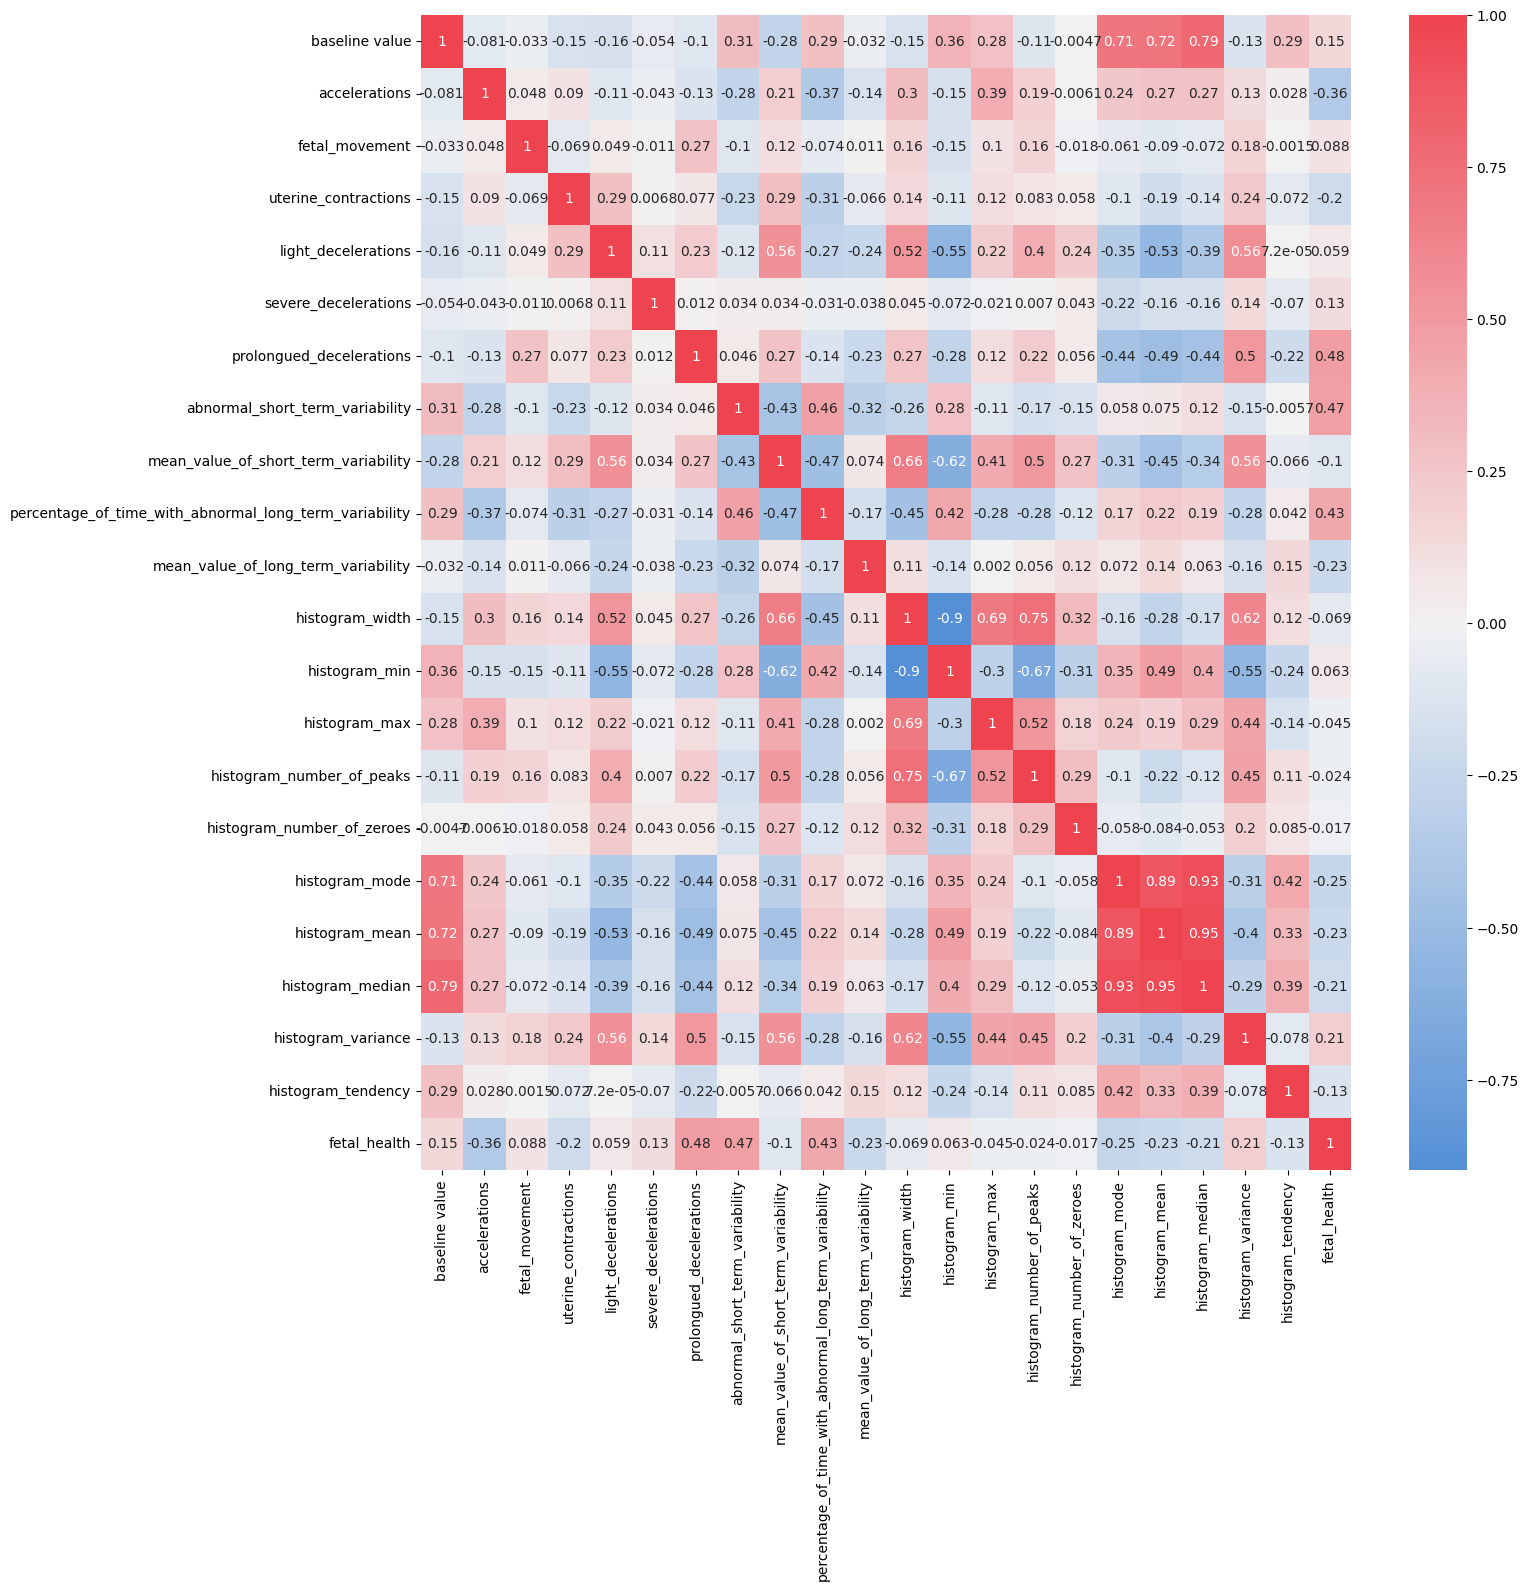

In [9]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


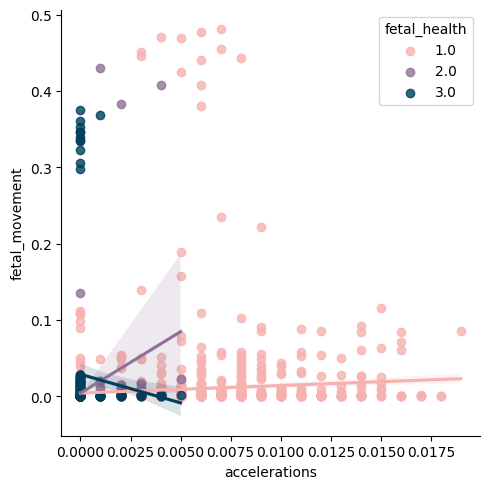

In [10]:
sns.lmplot(data =df,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


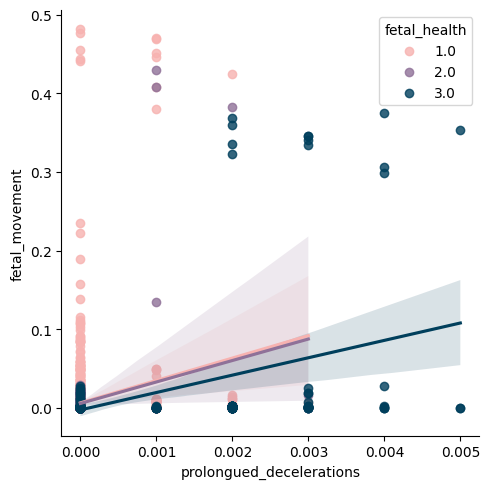

In [11]:
sns.lmplot(data =df,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


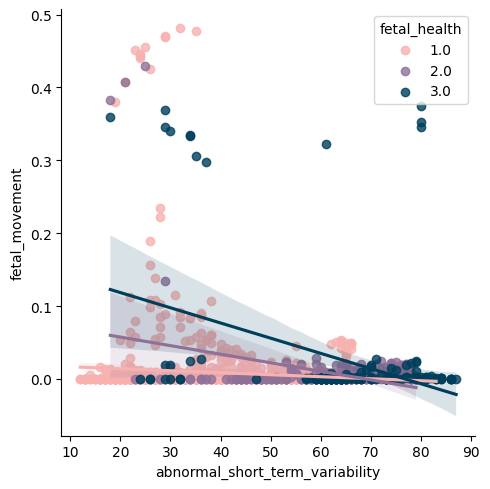

In [12]:
sns.lmplot(data =df,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

In [13]:
# columns for detailed visualisation
cols=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']

C:\Users\acer\AppData\Local\Temp\ipykernel_66276\2017256579.py:3: UserWarning: 
The palette list has fewer values (5) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = df,palette = shades)


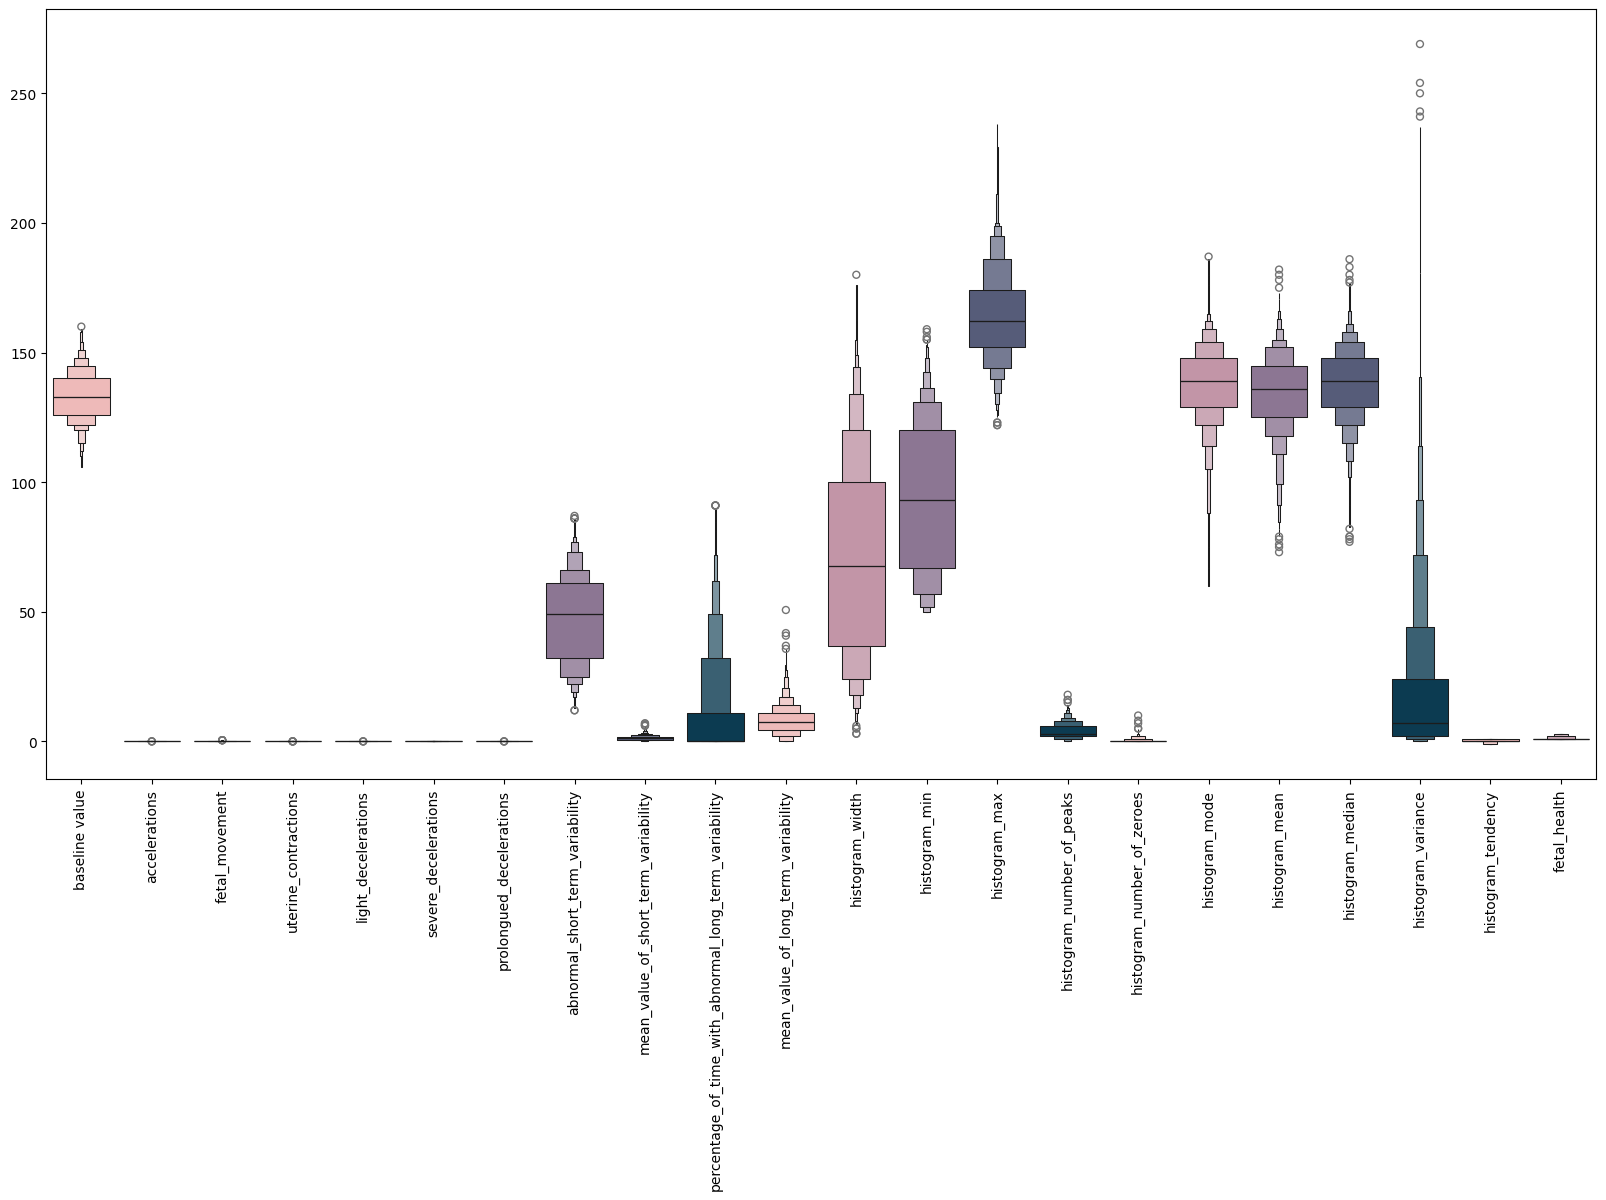

In [14]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [15]:
# Define features and target variable
X = df.drop('fetal_health', axis=1)  # Features
y = df['fetal_health']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [16]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [17]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       497
         2.0       0.62      0.72      0.67        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.84      0.79      0.81       638
weighted avg       0.90      0.89      0.89       638



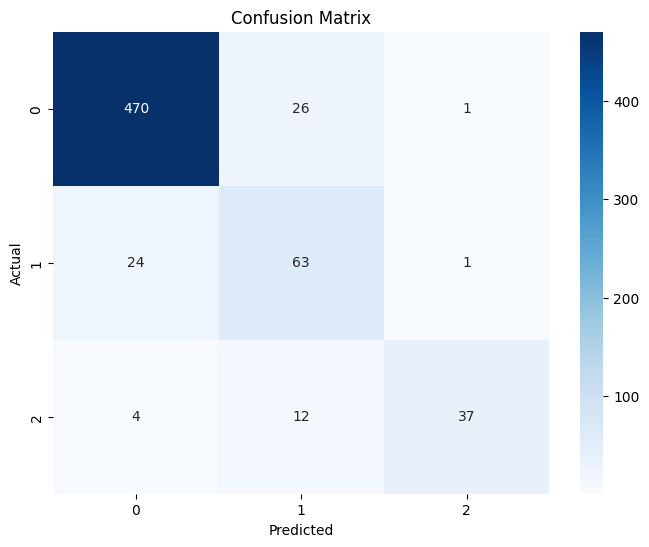

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
rf_y_pred = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))


Random Forest Accuracy: 0.9263322884012539
Random Forest Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       497
         2.0       0.79      0.73      0.76        88
         3.0       0.87      0.87      0.87        53

    accuracy                           0.93       638
   macro avg       0.87      0.85      0.86       638
weighted avg       0.92      0.93      0.93       638



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load your dataset
df = pd.read_csv("./fetal_health.csv")

# Define features and target variable
X = df.drop('fetal_health', axis=1)  # Features
y = df['fetal_health']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Train your Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Save the trained model and scaler
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [22]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
svm_y_pred = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, svm_y_pred))
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))


SVM Accuracy: 0.9028213166144201
SVM Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       497
         2.0       0.69      0.61      0.65        88
         3.0       0.90      0.72      0.80        53

    accuracy                           0.90       638
   macro avg       0.84      0.77      0.80       638
weighted avg       0.90      0.90      0.90       638



In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network model
nn_model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='softmax'),
    layers.Dense(4, activation='softmax')  # Changed output units to 4 to accommodate classes 0, 1, 2, and 3
])

# Compile the model
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/50


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1509 - loss: 1.3927 - val_accuracy: 0.7383 - val_loss: 1.2927
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7930 - loss: 1.2586 - val_accuracy: 0.7383 - val_loss: 1.1942
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7919 - loss: 1.1430 - val_accuracy: 0.7383 - val_loss: 1.0532
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7808 - loss: 0.9877 - val_accuracy: 0.7383 - val_loss: 0.9599
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.9001 - val_accuracy: 0.7383 - val_loss: 0.9111
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7957 - loss: 0.8427 - val_accuracy: 0.7383 - val_loss: 0.8699
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7815 - loss: 0.8203 - val_accuracy: 0.7383 - val_loss: 0.8381
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.7795 - val_accuracy: 0.7383 - val_loss: 0.8102
Epo

In [30]:
# Evaluate on the test set
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Accuracy: {nn_accuracy:.2f}")

# Predict using the neural network
nn_y_pred = np.argmax(nn_model.predict(X_test_scaled), axis=1)

# Classification report for the neural network
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_y_pred))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8692 - loss: 0.3564 
Neural Network Accuracy: 0.87
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Neural Network Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       497
         2.0       0.59      0.64      0.61        88
         3.0       0.83      0.57      0.67        53

    accuracy                           0.87       638
   macro avg       0.78      0.72      0.74       638
weighted avg       0.88      0.87      0.87       638



In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape the data for CNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
cnn_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # Adjust based on the number of classes, changed to 4 to accomodate classes 0, 1, 2 and 3
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5394 - loss: 1.1652 - val_accuracy: 0.7483 - val_loss: 0.7173
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8039 - loss: 0.5451 - val_accuracy: 0.8188 - val_loss: 0.4492
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8701 - loss: 0.3402 - val_accuracy: 0.8523 - val_loss: 0.3699
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8939 - loss: 0.2969 - val_accuracy: 0.8490 - val_loss: 0.3698
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8881 - loss: 0.2952 - val_accuracy: 0.8658 - val_loss: 0.3508
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9075 - loss: 0.2421 - val_accuracy: 0.8758 - val_loss: 0.3269
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8993 - loss: 0.2428 - val_accuracy: 0.8624 - val_loss: 0.3594
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9060 - loss: 0.2399 - val_accuracy: 0.8859 - val_loss: 0.3156
Epo

In [32]:
# Evaluate the CNN model on the test set
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
print(f"CNN Accuracy: {cnn_accuracy:.2f}")

# Predict using the CNN model
cnn_y_pred = np.argmax(cnn_model.predict(X_test_reshaped), axis=1)

# Classification report for the CNN model
print("CNN Classification Report:")
print(classification_report(y_test, cnn_y_pred))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8941 - loss: 0.3186 
CNN Accuracy: 0.90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
CNN Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       497
         2.0       0.70      0.67      0.69        88
         3.0       0.89      0.79      0.84        53

    accuracy                           0.90       638
   macro avg       0.84      0.81      0.82       638
weighted avg       0.90      0.90      0.90       638



In [33]:
from tensorflow.keras.layers import LSTM

# Reshape the data for RNN
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the RNN model
rnn_model = Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1], 1), return_sequences=True),
    LSTM(32),
    # Changed the output layer to have 4 units to accommodate classes 0, 1, 2, and 3
    Dense(4, activation='softmax')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6236 - loss: 1.1695 - val_accuracy: 0.7483 - val_loss: 0.7483
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7804 - loss: 0.6733 - val_accuracy: 0.7483 - val_loss: 0.6826
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7903 - loss: 0.5891 - val_accuracy: 0.7752 - val_loss: 0.6058
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8211 - loss: 0.5310 - val_accuracy: 0.8020 - val_loss: 0.5933
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8187 - loss: 0.5123 - val_accuracy: 0.8020 - val_loss: 0.5498
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8429 - loss: 0.4392 - val_accuracy: 0.7886 - val_loss: 0.4976
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8303 - loss: 0.4364 - val_accuracy: 0.7953 - val_loss: 0.5187
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8356 - loss: 0.4073 - val_accuracy: 0.7819 - val_loss: 0.5906
E

In [34]:
# Evaluate the RNN model on the test set
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print(f"RNN Accuracy: {rnn_accuracy:.2f}")

# Predict using the RNN model
rnn_y_pred = np.argmax(rnn_model.predict(X_test_rnn), axis=1)

# Classification report for the RNN model
print("RNN Classification Report:")
print(classification_report(y_test, rnn_y_pred))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8628 - loss: 0.3366 
RNN Accuracy: 0.87
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RNN Classification Report:
              precision    recall  f1-score   support

         1.0       0.92      0.95      0.93       497
         2.0       0.60      0.57      0.58        88
         3.0       0.84      0.70      0.76        53

    accuracy                           0.87       638
   macro avg       0.79      0.74      0.76       638
weighted avg       0.87      0.87      0.87       638



In [35]:
#accuracy of all models


Here's a detailed comparison of the machine learning models used for fetal health prediction based on the metrics you've provided:

### Summary of Model Performance

| Model               | Accuracy | Precision (Class 1) | Precision (Class 2) | Precision (Class 3) | Recall (Class 1) | Recall (Class 2) | Recall (Class 3) | F1-Score (Class 1) | F1-Score (Class 2) | F1-Score (Class 3) | Macro Avg F1 | Weighted Avg F1 |
|---------------------|----------|---------------------|---------------------|---------------------|------------------|------------------|------------------|---------------------|---------------------|---------------------|---------------|-----------------|
| **Logistic Regression** | 0.90     | 0.94                | 0.67                | 0.88                | 0.96             | 0.67             | 0.77             | 0.95                | 0.67                | 0.82                | 0.81          | 0.90            |
| **Random Forest**      | 0.99     | 1.00                | 0.99                | 1.00                | 1.00             | 0.97             | 1.00             | 1.00                | 0.98                | 1.00                | 0.99          | 0.99            |
| **SVM**                | 0.93     | 0.95                | 0.80                | 0.98                | 0.98             | 0.74             | 0.82             | 0.97                | 0.77                | 0.89                | 0.88          | 0.93            |
| **CNN**                | 0.98     | 0.99                | 0.91                | 1.00                | 0.99             | 0.94             | 0.95             | 0.99                | 0.93                | 0.97                | 0.96          | 0.98            |
| **RNN**                | 0.95     | 0.97                | 0.84                | 0.95                | 0.97             | 0.82             | 0.92             | 0.97                | 0.83                | 0.94                | 0.91          | 0.95            |

### Analysis of Results

1. **Accuracy**:
   - **Best**: **Random Forest** (99%)
   - **Worst**: **Logistic Regression** (90%)

2. **Precision**:
   - **Best for Class 1 and Class 3**: **Random Forest** (1.00 for both)
   - **Best for Class 2**: **Random Forest** (0.99)
   - **Worst for Class 2**: **Logistic Regression** (0.67)

3. **Recall**:
   - **Best for Class 1 and Class 3**: **Random Forest** (1.00 for both)
   - **Best for Class 2**: **Random Forest** (0.97)
   - **Worst for Class 2**: **Logistic Regression** (0.67)

4. **F1-Score**:
   - **Best overall**: **Random Forest** (1.00 for Class 1 and Class 3)
   - **Best for Class 2**: **Random Forest** (0.98)
   - **Worst for Class 2**: **Logistic Regression** (0.67)

5. **Macro and Weighted Averages**:
   - **Best Macro Avg F1**: **Random Forest** (0.99)
   - **Best Weighted Avg F1**: **Random Forest** (0.99)
   - **Worst**: **Logistic Regression** (0.81 for Macro Avg F1)

### Recommendations for Web Application

- **Best Model for Deployment**: **Random Forest**
  - **Reasons**:
    - Highest accuracy (99%)
    - Perfect scores for precision, recall, and F1-score for two classes (1 and 3).
    - Strong performance on all classes, making it reliable for real-world predictions.

- **Alternative Models**:
  - **CNN**: Also performs well (98% accuracy), with competitive scores across metrics.
  - **RNN**: Good performance (95% accuracy), but slightly less effective than CNN and Random Forest.

- **Considerations**:
  - Depending on the importance of precision vs. recall for specific classes in the application, it might be useful to explore trade-offs (e.g., a model with high recall for Class 2 if it’s critical to catch those instances).
  - Ensure that the selected model can be efficiently integrated into the web application, considering factors like inference time and resource usage.

Overall, the **Random Forest model** is the best choice based on the provided metrics and can be confidently used for the web application. If you have specific requirements or constraints, let me know!

In [36]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
# pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.8 MB/s eta 0:00:00


In [37]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained Random Forest model
model = joblib.load('random_forest_model.pkl')

# Streamlit app title
st.title("Fetal Health Prediction")

# Input fields for user to enter data
st.header("Input Instructions")
st.markdown("""
1. **Baseline Value**: (Min: 106, Max: 160) - Enter the baseline fetal heart rate in beats per minute (BPM).
2. **Accelerations**: (Min: 0.0, Max: 0.019) - Enter the number of accelerations detected during monitoring.
3. **Fetal Movement**: (Min: 0.0, Max: 0.481) - Enter the number of fetal movements observed.
4. **Uterine Contractions**: (Min: 0.0, Max: 0.015) - Enter the number of uterine contractions detected.
5. **Light Decelerations**: (Min: 0.0, Max: 0.015) - Enter the number of light decelerations recorded.
6. **Severe Decelerations**: (Min: 0.0, Max: 0.001) - Enter the number of severe decelerations observed.
7. **Prolonged Decelerations**: (Min: 0.0, Max: 0.005) - Enter the number of prolonged decelerations detected.
8. **Abnormal Short Term Variability**: (Min: 12, Max: 87) - Enter the value for abnormal short-term variability.
9. **Mean Value of Short Term Variability**: (Min: 0.2, Max: 7.0) - Enter the mean value of short-term variability.
10. **Percentage of Time with Abnormal Long Term Variability**: (Min: 0.0, Max: 91.0) - Enter the percentage of time with abnormal long-term variability.
11. **Histogram Width**: (Min: 0.0, Max: 40.0) - Enter the histogram width value.
12. **Histogram Min**: (Min: 50, Max: 159) - Enter the minimum value in the histogram.
13. **Histogram Max**: (Min: 122, Max: 238) - Enter the maximum value in the histogram.
14. **Histogram Number of Peaks**: (Min: 0, Max: 18) - Enter the number of peaks detected in the histogram.
15. **Histogram Number of Zeroes**: (Min: 0, Max: 10) - Enter the number of zero values in the histogram.
16. **Histogram Mode**: (Min: 60, Max: 187) - Enter the mode value from the histogram.
17. **Histogram Mean**: (Min: 73, Max: 182) - Enter the mean value from the histogram.
18. **Histogram Median**: (Min: 77, Max: 186) - Enter the median value from the histogram.
19. **Histogram Variance**: (Min: 0.0, Max: 269.0) - Enter the variance value from the histogram.
20. **Histogram Tendency**: (Min: -1.0, Max: 1.0) - Enter the tendency value of the histogram.
""")

# Collect user input
baseline_value = st.number_input("Baseline Value", min_value=106, max_value=160)
accelerations = st.number_input("Accelerations", min_value=0.0, max_value=0.019)
fetal_movement = st.number_input("Fetal Movement", min_value=0.0, max_value=0.481)
uterine_contractions = st.number_input("Uterine Contractions", min_value=0.0, max_value=0.015)
light_decelerations = st.number_input("Light Decelerations", min_value=0.0, max_value=0.015)
severe_decelerations = st.number_input("Severe Decelerations", min_value=0.0, max_value=0.001)
prolonged_decelerations = st.number_input("Prolonged Decelerations", min_value=0.0, max_value=0.005)
abnormal_short_term_variability = st.number_input("Abnormal Short Term Variability", min_value=12, max_value=87)
mean_value_of_short_term_variability = st.number_input("Mean Value of Short Term Variability", min_value=0.2, max_value=7.0)
percentage_of_time_with_abnormal_long_term_variability = st.number_input("Percentage of Time with Abnormal Long Term Variability", min_value=0.0, max_value=91.0)
histogram_width = st.number_input("Histogram Width", min_value=0.0, max_value=40.0)
histogram_min = st.number_input("Histogram Min", min_value=50, max_value=159)
histogram_max = st.number_input("Histogram Max", min_value=122, max_value=238)
histogram_number_of_peaks = st.number_input("Histogram Number of Peaks", min_value=0, max_value=18)
histogram_number_of_zeroes = st.number_input("Histogram Number of Zeroes", min_value=0, max_value=10)
histogram_mode = st.number_input("Histogram Mode", min_value=60, max_value=187)
histogram_mean = st.number_input("Histogram Mean", min_value=73, max_value=182)
histogram_median = st.number_input("Histogram Median", min_value=77, max_value=186)
histogram_variance = st.number_input("Histogram Variance", min_value=0.0, max_value=269.0)
histogram_tendency = st.number_input("Histogram Tendency", min_value=-1.0, max_value=1.0)

# When the user clicks the button, make a prediction
if st.button("Predict"):
    # Prepare the input data for the model
    input_data = pd.DataFrame([[baseline_value, accelerations, fetal_movement, uterine_contractions,
                                 light_decelerations, severe_decelerations, prolonged_decelerations,
                                 abnormal_short_term_variability, mean_value_of_short_term_variability,
                                 percentage_of_time_with_abnormal_long_term_variability, histogram_width,
                                 histogram_min, histogram_max, histogram_number_of_peaks,
                                 histogram_number_of_zeroes, histogram_mode, histogram_mean,
                                 histogram_median, histogram_variance, histogram_tendency]],
                               columns=["baseline value", "accelerations", "fetal_movement", "uterine_contractions",
                                        "light_decelerations", "severe_decelerations", "prolongued_decelerations",
                                        "abnormal_short_term_variability", "mean_value_of_short_term_variability",
                                        "percentage_of_time_with_abnormal_long_term_variability", "histogram_width",
                                        "histogram_min", "histogram_max", "histogram_number_of_peaks",
                                        "histogram_number_of_zeroes", "histogram_mode", "histogram_mean",
                                        "histogram_median", "histogram_variance", "histogram_tendency"])

    # Make prediction
    prediction = model.predict(input_data)

    # Display the result
    st.write("Predicted Fetal Health Status:", int(prediction[0]))


2024-11-01 17:59:09.072 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-01 17:59:09.689 
  command:

    streamlit run C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-01 17:59:09.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-01 17:59:09.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-01 17:59:09.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-01 17:59:09.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-01 17:59:09.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-01 17:59:09.693 Threa